# Project: Regression Modeling with the Boston Housing Dataset

## Introduction

In this lab, you'll apply the regression analysis and diagnostics techniques covered in this section to the "Boston Housing" dataset. You performed a detailed EDA for this dataset earlier on, and hopefully, you more or less recall how this data is structured! In this lab, you'll use some of the features in this dataset to create a linear model to predict the house price!

## Objectives
You will be able to:
* Perform a linear regression using statsmodels
* Determine if a particular set of data exhibits the assumptions of linear regression
* Evaluate a linear regression model by using statistical performance metrics pertaining to overall model and specific parameters
* Use the coefficient of determination to determine model performance
* Interpret the parameters of a simple linear regression model in relation to what they signify for specific data


## Let's get started

### Import necessary libraries and load 'BostonHousing.csv' as a pandas dataframe

In [81]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('BostonHousing.csv')

The columns in the Boston housing data represent the dependent and independent variables. The dependent variable here is the median house value `MEDV`. The description of the other variables is available on [KAGGLE](https://www.kaggle.com/c/boston-housing). 

### Inspect the columns of the dataset and comment on type of variables present

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
# Record your observations here 
# All quantitative data except rad (probably) and maybe tax and myabe chas.

### Create histograms for all variables in the dataset and comment on their shape (uniform or not?)

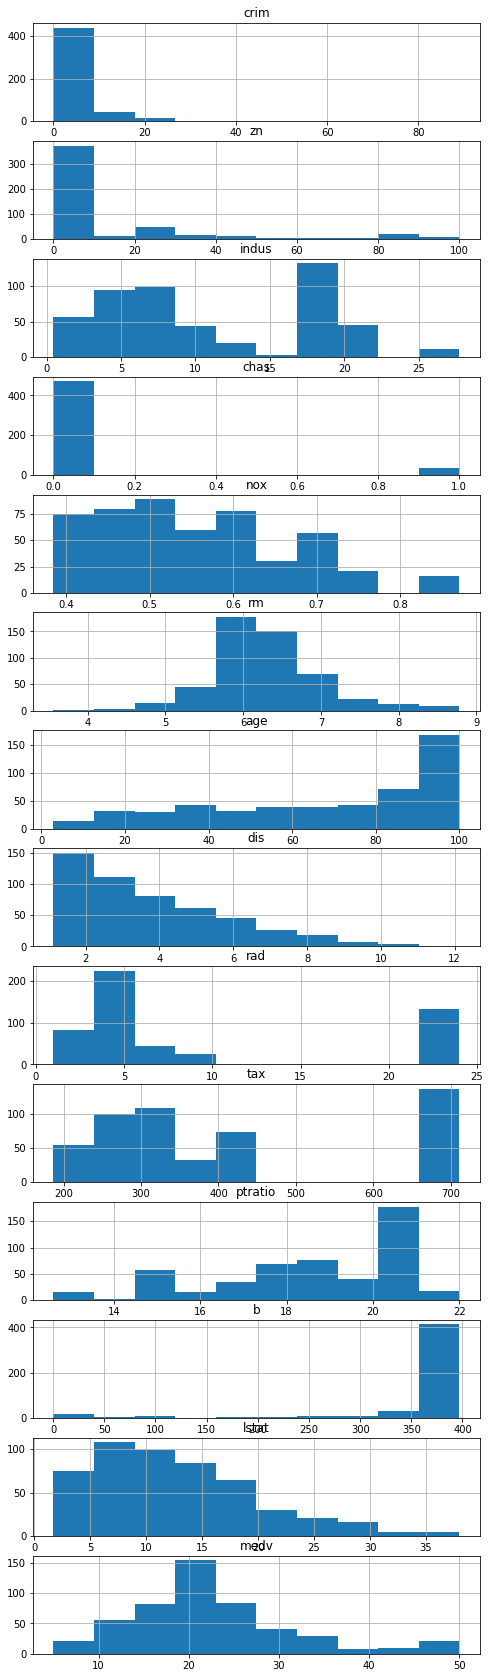

In [15]:
# Your code here 
fig, axes = plt.subplots(14, figsize=(8, 30))
for i, column in enumerate(df.columns):
    df[column].hist(ax=axes[i], label=str(column))
    axes[i].set_title(str(column))

In [16]:
# You observations here 
# crim, zn, nox, rm, age, ptratio, lstat, medv all potentially, approximately normal distributions.

Based on this, we preselected some features  for you which appear to be more 'normal' than others.
### Create a new dataset with `['crim', 'dis', 'rm', 'zn', 'age', 'medv']`

In [21]:
# Your code here
select = df.loc[:, ['crim', 'dis', 'rm', 'zn', 'age', 'medv']]
select.head()

,crim,dis,rm,zn,age,medv
0,0.00632,4.0900,6.575,18.0,65.2,24.0
1,0.02731,4.9671,6.421,0.0,78.9,21.6
2,0.02729,4.9671,7.185,0.0,61.1,34.7
3,0.03237,6.0622,6.998,0.0,45.8,33.4
4,0.06905,6.0622,7.147,0.0,54.2,36.2


### Check the linearity assumption for all chosen features with target variable using scatter plots

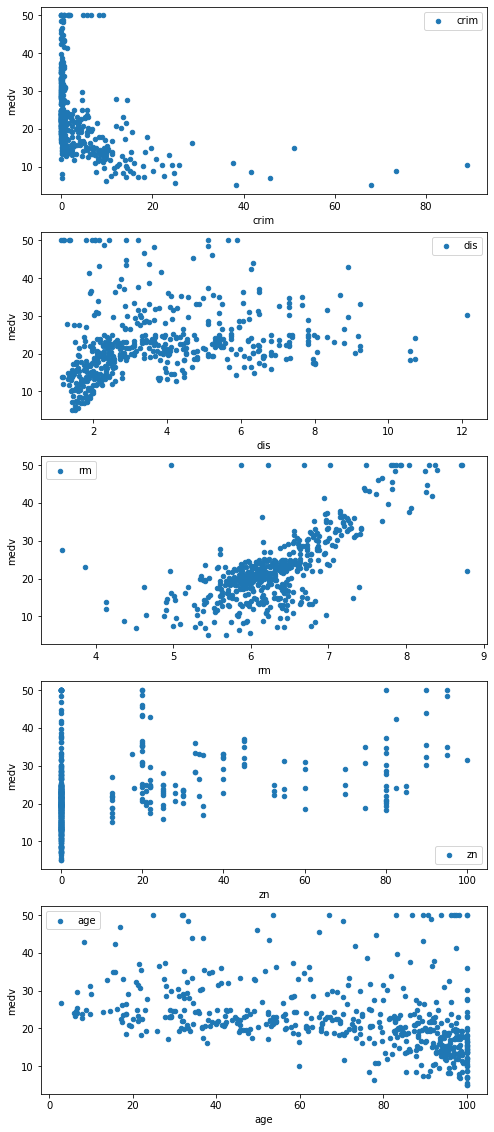

In [27]:
# Your code here 
fig, axes = plt.subplots(5, figsize=(8, 20))
for i in range(len(axes)):
    select.plot.scatter(select.columns[i], 'medv', label=select.columns[i], ax=axes[i])
    axes[i].legend()

In [ ]:
# Your observations here 
# Only dis and rm, maybe zn, and MAYBE age appear to have linear relationships.

Clearly, your data needs a lot of preprocessing to improve the results. This key behind a Kaggle competition is to process the data in such a way that you can identify the relationships and make predictions in the best possible way. For now, we'll use the dataset untouched and just move on with the regression. The assumptions are not _exactly_ all fulfilled, but they still hold to a level that we can move on. 

### Let's do Regression 

Now, let's perform a number of simple regression experiments between the chosen independent variables and the dependent variable (price). You'll do this in a loop and in every iteration, you should pick one of the independent variables. Perform the following steps:

* Run a simple OLS regression between independent and dependent variables
* Plot a regression line on the scatter plots
* Plot the residuals using `sm.graphics.plot_regress_exog()`
* Plot a Q-Q plot for regression residuals normality test 
* Store following values in array for each iteration:
    * Independent Variable
    * r_squared'
    * intercept'
    * 'slope'
    * 'p-value'
    * 'normality (JB)' 
* Comment on each output 

<Figure size 432x288 with 0 Axes>

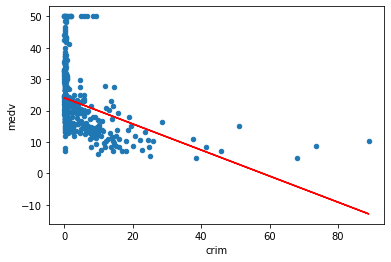

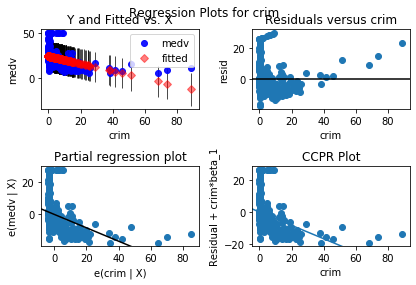

<Figure size 432x288 with 0 Axes>

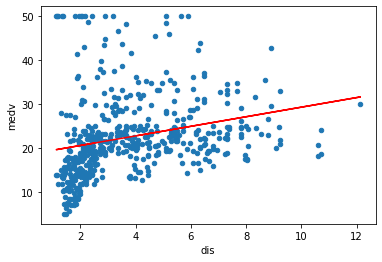

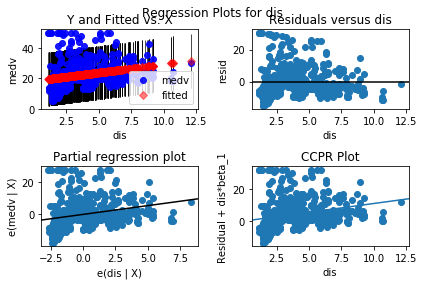

<Figure size 432x288 with 0 Axes>

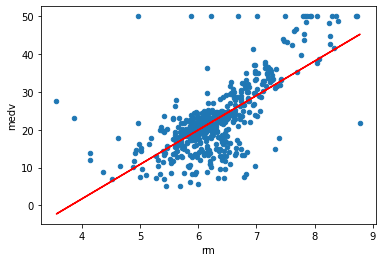

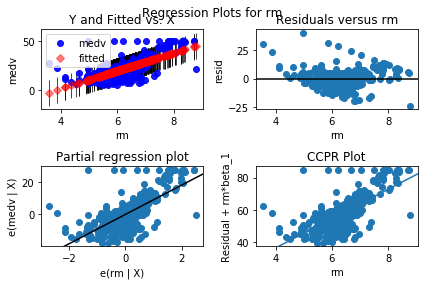

<Figure size 432x288 with 0 Axes>

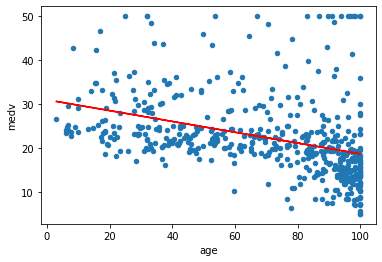

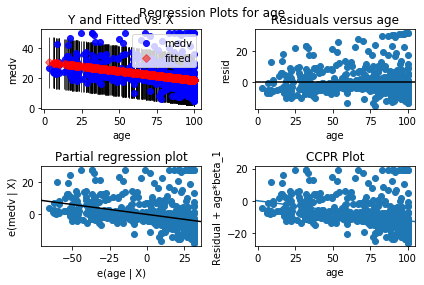

In [86]:
# Your code here
diagnostics = {}

for i in ['crim', 'dis', 'rm', 'age']:
    indv = i
    f = 'medv ~ {}'.format(indv)
    model = smf.ols(f, data=select).fit()
    m, c, r_squared= model.params[1], model.params[0], model.rsquared
    jb = sms.jarque_bera(model.resid)[0]
    diagnostics[indv] = [m, c, r_squared, jb]
    fig = plt.figure()
    select.plot.scatter(indv, 'medv')
    ys = select[indv] * m + c
    plt.plot(select[indv], ys, color='red')
    t = sm.graphics.plot_regress_exog(model, indv)

In [87]:
diagnostics

{'crim': [-0.4151902779150912,
  24.033106174123876,
  0.15078046904975717,
  295.40371976845904],
 'dis': [1.091613015841109,
  18.39008833049339,
  0.062464372121782796,
  305.10416474827383],
 'rm': [9.102108981180312,
  -34.670620776438575,
  0.4835254559913341,
  612.4489850641658],
 'age': [-0.12316272123567976,
  30.97867776261805,
  0.14209474407780465,
  456.98343364898903]}

In [90]:
results = pd.DataFrame(diagnostics).transpose()
results.columns = ['m', 'c', 'rsquared', 'jb']
results

,m,c,rsquared,jb
crim,-0.415190,24.033106,0.150780,295.403720
dis,1.091613,18.390088,0.062464,305.104165
rm,9.102109,-34.670621,0.483525,612.448985
age,-0.123163,30.978678,0.142095,456.983434


In [118]:
#Your observations here 
# best rsquared value is rm, though it isn't great, and all have pretty atrocious Jarque-Bera test results.

Clearly, the results are not very reliable. The best R-Squared is witnessed with `rm`, so in this analysis, this is our best predictor. 

### How can you improve these results?
1. Preprocessing 

This is where the preprocessing of data comes in. Dealing with outliers, normalizing data, scaling values etc. can help regression analysis get more meaningful results from the given data. 

2. Advanced Analytical Methods

Simple regression is a very basic analysis technique and trying to fit a straight line solution to complex analytical questions may prove to be very inefficient. Later on, you'll explore multiple regression where you can use multiple features **at once** to define a relationship with the outcome. You'll also look at some preprocessing and data simplification techniques and revisit the Boston dataset with an improved toolkit. 

## Level up - Optional 

Apply some data wrangling skills that you have learned in the previous section to pre-process the set of independent variables we chose above. You can start off with outliers and think of a way to deal with them. See how it affects the goodness of fit. 

## Summary 

In this lab, you applied your skills learned so far on a new data set. You looked at the outcome of your analysis and realized that the data might need some preprocessing to see a clear improvement in the results. You'll pick this back up later on, after learning about more preprocessing techniques and advanced modeling techniques.